# Trading Interview Game

Now we have introduced CFR and understand the basics, lets try apply it to a problem inspired by a real interview question from a top quantitative trading firm.

## The Game - Part 1

The game starts with two players, both have to submit a number between 0 and 100 on a piece of paper. After the numbers are submitted, the papers are checked and whoever submitted the larger number must pay the other player their number. 

A few examples:
* Player A submits 90, Player B submits 10. Player B wins so receives \$10.
* Player A submits 15, Player B submits 20. Player A wins so receives \$15.
* Player A submits 1, Player B submits 99. Player A wins so receives \$1.

Imagine you are playing this game and versing an opponent who submits a random number between 1 and 100.
The warm-up question, which can be solved with just paper and pen, is to calculate the optimal number for you to submit, such that you maximise you expected value in this game. 




## Part 1 - Solution

Let $X$ be the number we submit. We can write the probability we win as 
$$
P(X) = 1 - \frac{X}{100}
$$
The payout when we win is simply $X$. The payout when we lose is the other players number. As this will be distributed uniformly between 0 and $X$, the loss will be on average, $X/2$. Therefore we write the expected value as
$$
\mathbb{E}(X) = X P(X) - \frac{X}{2} (1 - P(X)) = X - \frac{3 X^2}{200}
$$

Now we just solve for the maximum of this function (take derivative and set to zero) to get $X_0 = 33$.




## The Game - Part 2

Now we introduce a third player to the game who is perfectly rational, as are you, and there is still a player who submits a random bid. The penalty for losing a game is now greater, as the person who submits the highest number must now pay all the other players their number. If there is a tie for highest bid, they each pay half of the third players number.

For example:
* Player A submits 50, Player B submits 40, Player C submits 30. A loses so pays B \\$40 and pays C \\$30.
* Player A submits 20, Player B submits 50, Player C submits 50. B and C tie to lose, so both pay A \\$10 each.


Our previous strategy of picking a single number is no longer profitable as we will get exploited by the new player. It is likely we will now need to play a mixed strategy. Let's try solve this problem using CFR where we will find the nash equilibrium between player A and player B, and play this strategy to maximise our expected value. 


In [41]:
import numpy as np
import matplotlib.pyplot as plt
N = 101
actions = np.arange(1, N)

In [50]:
'''
Tip: to speedup the computation, we can incorporate the randomness 
of player C's bid into our payoff function by taking an average over 
all 100 possible choices, instead of actually choosing a random number for player C.
'''

# hero number is first
def game_outcome(numbers: list[int]) -> int:
    m = max(numbers)
    max_index = [i for i, j in enumerate(numbers) if j == m]

    outcome = numbers.copy()

    if len(max_index) == 1:
        loss = m - sum(numbers)
        outcome[max_index[0]] = loss

        return outcome[0]

    if len(max_index) == 2:
        loss = m - sum(numbers) / 2
        outcome[max_index[0]] = loss
        outcome[max_index[1]] = loss

        return outcome[0]

    if len(max_index) == 3:
        return 0


In [51]:
'''
Action is the number to submit (100 possible actions)
'''

def payoff(hero_action: int, villain_strategy: np.array(float)) -> float:
    '''
    PAYOFF FUNCTION HERE
    '''
    EV = 0

    for i in range(N):
        for j in range(N):
            nums = [hero_action, i, j]
            EV += game_outcome(nums) * 1/100 * villain_strategy[i]

    return EV

    

In [52]:
'''
Calculate immediate regret for every action
'''
def calculate_immediate_regret(hero_strategy: np.array(float), villain_strategy: np.array(float)) -> np.array(float):
    '''
    IMMEDIATE REGRET 
    '''
    hero_EV = 0
    for a in actions:
        hero_EV += hero_strategy[a] * payoff(a, villain_strategy)

    regrets = np.zeros(N)
    
    for a in actions:
        regrets[a] = payoff(a, villain_strategy) - hero_EV

    return regrets



In [53]:

'''
Calculate new strategy based on accumulated regret for the hero
'''

def calculate_strategy(acc_regrets: np.array(float)) -> np.array(float):
    '''
    CALCULATE NEW STRATEGY
    '''
    positive_regret = np.where(acc_regrets > 0, acc_regrets, 0)

    normalisation = np.sum(positive_regret)

    if normalisation == 0:
        return np.ones(N) / N
        
    return positive_regret / normalisation
        



In [ ]:
'''
Run CFR algorithm.
We set initial strategy for player A and B to both pick rock 100% of the time. 
'''

strategyA = np.ones(N) / N
strategyB = np.ones(N) / N

acc_regretsA = np.zeros(N)
acc_regretsB = np.zeros(N)

steps = 500

strat_history = []

for t in range(steps):
    print(t)
    acc_regretsA += calculate_immediate_regret(strategyA, strategyB)
    strategyA = calculate_strategy(acc_regretsA)
    
    acc_regretsB += calculate_immediate_regret(strategyB, strategyA)
    strategyB = calculate_strategy(acc_regretsB)

    strat_history.append(strategyA)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


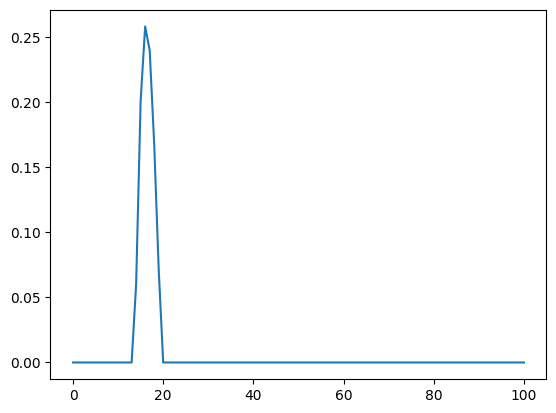

In [58]:
fig, ax = plt.subplots()

ax.plot(strategyA)
plt.show()

In [57]:
strategyA

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06034164,
       0.2014945 , 0.25823278, 0.23991345, 0.16825638, 0.07176125,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     